# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [5]:
project_data=project_data.sample(n=50000)

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
34641,178751,p039744,1421b45cbf0d5ce45fb9834b50c5cd13,Ms.,PA,2016-12-06 12:21:47,Grades 3-5,Paper Jam,I am teaching 7 students with Autism this year...,I am an autistic support teacher for grades 3r...,NaN,NaN,My students need paper and colored ink for wor...,3,1,SpecialNeeds,SpecialNeeds,I am teaching 7 students with Autism this year...
62718,11720,p001027,96b6053c0bf7cbc443cffa53c3a8349a,Ms.,CA,2017-02-26 11:55:12,Grades 3-5,Financial Literacy for Kids with Special Needs!,"My students are enthusiastic kindergarteners, ...",This project includes an iPad 2 so that studen...,NaN,NaN,"My students need an iPad 2, headphones, and a ...",0,1,Math_Science SpecialNeeds,Mathematics SpecialNeeds,"My students are enthusiastic kindergarteners, ..."


In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[45000])
print("="*50)

I am teaching 7 students with Autism this year.    My students are very cooperative and are ready to learn.  I have one non verbal student and the rest of my students are on different reading and math levels ranging from Kindergarten to 5th grade.\r\nThere are many ways that I can help my students but I can not do this without  materials and other tools.  Paper, paper, and more paper is needed to print IEPs, progress monitoring data, and communication logs, which are sent home daily.  Each student brings their own unique personality to the class such as the student who likes to participate and tries to answer many questions even though she may not understand or gives answer completely off topic.  Then there's the quiet student who answers questions correctly all the time and speaks only when he is supposed to speak.  All of my students are great and I can't wait to use the materials to help make their learning more fun and meaningful.I am an autistic support teacher for grades 3rd-5th.

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

I teach at an amazing school in San Diego!  I love all the students that walk through the halls, whether they are mine, were mine, or will be mine one day.  They are so bright and full of amazing potential. This year I am moving to first grade and I just know that they will be a phenomenal group.  I can not wait to meet them!\r\n\r\nThis will be the best year ever!\r\n\r\nI am so excited to start the year.  I have been working away all summer preparing for this grade change and learning my new grade level curriculum.  I have lots of new things in store for this first year in first grade.My students will use the new writing journals each day to improve writing skills.  Having paper with appropriate line spacing will help improve letter formation.  I will use the sticker dots to better level our wonderful classroom library so they can choose books appropriately.  Students will be able to locate books based on the color group which corresponds to their reading level.  Lastly, the remainin

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

I teach at an amazing school in San Diego!  I love all the students that walk through the halls, whether they are mine, were mine, or will be mine one day.  They are so bright and full of amazing potential. This year I am moving to first grade and I just know that they will be a phenomenal group.  I can not wait to meet them!    This will be the best year ever!    I am so excited to start the year.  I have been working away all summer preparing for this grade change and learning my new grade level curriculum.  I have lots of new things in store for this first year in first grade.My students will use the new writing journals each day to improve writing skills.  Having paper with appropriate line spacing will help improve letter formation.  I will use the sticker dots to better level our wonderful classroom library so they can choose books appropriately.  Students will be able to locate books based on the color group which corresponds to their reading level.  Lastly, the remaining suppli

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

I teach at an amazing school in San Diego I love all the students that walk through the halls whether they are mine were mine or will be mine one day They are so bright and full of amazing potential This year I am moving to first grade and I just know that they will be a phenomenal group I can not wait to meet them This will be the best year ever I am so excited to start the year I have been working away all summer preparing for this grade change and learning my new grade level curriculum I have lots of new things in store for this first year in first grade My students will use the new writing journals each day to improve writing skills Having paper with appropriate line spacing will help improve letter formation I will use the sticker dots to better level our wonderful classroom library so they can choose books appropriately Students will be able to locate books based on the color group which corresponds to their reading level Lastly the remaining supplies will be used for a new posit

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e.lower().strip() for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.strip())

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:04<00:00, 780.76it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'teach amazing school san diego love students walk halls whether mine mine mine one day bright full amazing potential year moving first grade know phenomenal group not wait meet best year ever excited start year working away summer preparing grade change learning new grade level curriculum lots new things store first year first grade students use new writing journals day improve writing skills paper appropriate line spacing help improve letter formation use sticker dots better level wonderful classroom library choose books appropriately students able locate books based color group corresponds reading level lastly remaining supplies used new positive behavior support system able make new brag tags year students earn weekly basis keep throughout year necklace wear day class nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
# similarly you can preprocess the titles also
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e.lower().strip() for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.strip())
project_data["project_title"]=preprocessed_titles

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 17480.47it/s]


In [20]:
preprocessed_school_state=[]
for state in tqdm(project_data['school_state'].values):
    state=decontracted(state)
    state=state.replace(".",'')
    state=state.replace('"','')
    state=state.replace('-','')
    state=state.replace('_','')
    state=state.replace(' ','')
    state=re.sub('[^A-za-z]+','',state)
    preprocessed_school_state.append(state.strip())
print(preprocessed_school_state[:15])

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 31241.95it/s]


['PA', 'CA', 'MA', 'AL', 'CA', 'NJ', 'OK', 'IN', 'IN', 'FL', 'GA', 'LA', 'SC', 'PA', 'NC']


In [21]:
preprocessed_teacher_prefix=[]
for prefix in tqdm(project_data["teacher_prefix"].map(str).values):
    prefix=decontracted(prefix)
    prefix=prefix.replace(".",'')
    prefix=prefix.replace('"','')
    prefix=prefix.replace('-','')
    prefix=prefix.replace('_','')
    prefix=prefix.replace(' ','')
    prefix=re.sub('[^A-Za-z]+','',prefix)
    preprocessed_teacher_prefix.append(prefix.strip())
print(preprocessed_teacher_prefix[:15])

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 20661.72it/s]


['Ms', 'Ms', 'Ms', 'Teacher', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mrs', 'Mrs', 'Ms', 'Mrs', 'Mrs', 'Ms', 'Mrs']


In [22]:
print(project_data["project_grade_category"].values)
preprocessed_project_grade=[]
for grade in tqdm(project_data["project_grade_category"].values):
    grade=decontracted(grade)
    grade=grade.replace('.','')
    grade=grade.replace('"','')
    grade=grade.replace('-','')
    grade=grade.replace(' ','')
    grade=grade.replace('_','')
    grade=re.sub('[^A-Za-z0-9]+','',grade)
    preprocessed_project_grade.append(grade)
print(preprocessed_project_grade[:20])

['Grades 3-5' 'Grades 3-5' 'Grades 9-12' ... 'Grades PreK-2'
 'Grades PreK-2' 'Grades PreK-2']


100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 27621.48it/s]


['Grades35', 'Grades35', 'Grades912', 'Grades68', 'Grades35', 'Grades912', 'Grades35', 'Grades68', 'Grades68', 'GradesPreK2', 'Grades68', 'GradesPreK2', 'Grades912', 'Grades68', 'GradesPreK2', 'GradesPreK2', 'GradesPreK2', 'GradesPreK2', 'GradesPreK2', 'Grades35']


## 1.5 Preparing data for models

In [23]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [24]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [28]:
project_data=project_data[["teacher_number_of_previously_posted_projects","price","clean_categories","clean_subcategories","project_title","essay","project_is_approved"]]
project_data["teacher_prefix"]=preprocessed_teacher_prefix
project_data["school_state"]=preprocessed_school_state
project_data["project_grade_category"]=preprocessed_project_grade

In [31]:
from sklearn.model_selection import train_test_split,GridSearchCV
target=project_data["project_is_approved"].values
data=project_data.drop("project_is_approved",axis=1)
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3,random_state=42,stratify=target)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [32]:
from sklearn.preprocessing import StandardScaler
scaler_1=StandardScaler().fit(x_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
tnoppp_train=scaler_1.transform(x_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
tnoppp_test=scaler_1.transform(x_test["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))

scaler_2=StandardScaler().fit(x_train["price"].values.reshape(-1,1))
price_train=scaler_2.transform(x_train["price"].values.reshape(-1,1))
price_test=scaler_2.transform(x_test["price"].values.reshape(-1,1))

# Responce coding for categorical feature:-

In [33]:
x_train["project_is_approved"]=y_train
x_test["project_is_approved"]=y_test

In [34]:
def get_cat_fea_dict(alpha, feature, df):
    
    value_count = x_train[feature].value_counts()
    cat_dict = dict()
    for i, denominator in value_count.items():
        vec = []
        for k in range(2):
            cls_cnt =x_train.loc[(x_train['project_is_approved']==k) & (x_train[feature]==i)]
            vec.append((cls_cnt.shape[0] + alpha)/ (denominator + 2*alpha))
        cat_dict[i]=vec
    return cat_dict

def get_cat_feature(alpha, feature, df):

    cat_dict = get_cat_fea_dict(alpha, feature, df)
    value_count = x_train[feature].value_counts() 
    cat_fea = []
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            cat_fea.append(cat_dict[row[feature]])
        else:
            cat_fea.append([0.5,0.5])
    return cat_fea

In [35]:
alpha=1

In [36]:
school_state_train=np.array(get_cat_feature(alpha,"school_state",x_train))
school_state_test=np.array(get_cat_feature(alpha,"school_state",x_test))

In [40]:
teacher_prefix_train=np.array(get_cat_feature(alpha,"teacher_prefix",x_train))
teacher_prefix_test=np.array(get_cat_feature(alpha,"teacher_prefix",x_test))

In [41]:
project_grade_train=np.array(get_cat_feature(alpha,"project_grade_category",x_train))
project_grade_test=np.array(get_cat_feature(alpha,"project_grade_category",x_test))

In [42]:
categories_train=np.array(get_cat_feature(alpha,"clean_categories",x_train))
categories_test=np.array(get_cat_feature(alpha,"clean_categories",x_test))

In [43]:
subcategories_train=np.array(get_cat_feature(alpha,"clean_subcategories",x_train))
subcategories_test=np.array(get_cat_feature(alpha,"clean_subcategories",x_test))

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [44]:
count_vect_titles=CountVectorizer(min_df=5)
train_title_bow=count_vect_titles.fit_transform(x_train["project_title"].values)
test_title_bow=count_vect_titles.transform(x_test["project_title"].values)
count_vect_essays=CountVectorizer(min_df=10)
train_essay_bow=count_vect_essays.fit_transform(x_train["essay"].values)
test_essay_bow=count_vect_essays.transform(x_test["essay"].values)

In [45]:
print(train_title_bow.shape)
print(test_title_bow.shape)
print(train_essay_bow.shape)
print(test_essay_bow.shape)

(35000, 2606)
(15000, 2606)
(35000, 10973)
(15000, 10973)


In [46]:
tfidf_vect_titles=TfidfVectorizer(min_df=5)
train_title_tfidf=tfidf_vect_titles.fit_transform(x_train["project_title"].values)
test_title_tfidf=tfidf_vect_titles.transform(x_test["project_title"].values)
tfidf_vect_essays=TfidfVectorizer(min_df=10)
train_essay_tfidf=tfidf_vect_essays.fit_transform(x_train["essay"].values)
test_essay_tfidf=tfidf_vect_essays.transform(x_test["essay"].values)

In [47]:
print(train_title_tfidf.shape)
print(test_title_tfidf.shape)
print(train_essay_tfidf.shape)
print(test_essay_tfidf.shape)

(35000, 2606)
(15000, 2606)
(35000, 10973)
(15000, 10973)


In [48]:
train_title_list=[]
for i in x_train["project_title"].values:
    train_title_list.append(i.split())
w2v_model_titles=Word2Vec(train_title_list,min_count=5,size=50)
title_w2v_words=w2v_model_titles.wv.vocab

train_avg_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["project_title"].values): 
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): 
        if word in title_w2v_words:
            vector +=w2v_model_titles.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors_titles.append(vector)

print(len(train_avg_w2v_vectors_titles))
print(len(train_avg_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 35000/35000 [00:01<00:00, 25453.17it/s]


35000
50


In [49]:
test_avg_w2v_vectors_titles = [] # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["project_title"].values): 
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): 
        if word in title_w2v_words:
            vector +=w2v_model_titles.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors_titles.append(vector)

print(len(test_avg_w2v_vectors_titles))
print(len(test_avg_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 23735.40it/s]


15000
50


In [50]:
train_essay_list=[]
for i in x_train["essay"].values:
    train_essay_list.append(i.split())
    
w2v_model_essays=Word2Vec(train_essay_list,min_count=10,size=50)

essay_w2v_words=w2v_model_essays.wv.vocab
train_avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["essay"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in essay_w2v_words:
            vector +=w2v_model_essays.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors_essays.append(vector)

print(len(train_avg_w2v_vectors_essays))
print(len(train_avg_w2v_vectors_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 35000/35000 [01:02<00:00, 559.91it/s]


35000
50


In [51]:
test_avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["essay"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in essay_w2v_words:
            vector +=w2v_model_essays.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors_essays.append(vector)

print(len(test_avg_w2v_vectors_essays))
print(len(test_avg_w2v_vectors_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [00:26<00:00, 570.34it/s]


15000
50


In [52]:
tfidf_model_titles = TfidfVectorizer()
tfidf_matrix_train_title=tfidf_model_titles.fit_transform(x_train["project_title"].values)
tfidf_matrix_test_title=tfidf_model_titles.transform(x_test["project_title"].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_t = dict(zip(tfidf_model_titles.get_feature_names(), list(tfidf_model_titles.idf_)))
tfidf_words_titles = set(tfidf_model_titles.get_feature_names())

train_tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["project_title"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in title_w2v_words) and (word in tfidf_words_titles):
            vec = w2v_model_titles.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_t[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_vectors_titles.append(vector)

print(len(train_tfidf_w2v_vectors_titles))
print(len(train_tfidf_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 35000/35000 [00:02<00:00, 15696.34it/s]


35000
50


In [53]:
test_tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["project_title"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in title_w2v_words) and (word in tfidf_words_titles):
            vec = w2v_model_titles.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_t[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_vectors_titles.append(vector)

print(len(test_tfidf_w2v_vectors_titles))
print(len(test_tfidf_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 15620.60it/s]


15000
50


In [54]:
tfidf_model_essay = TfidfVectorizer()
tfidf_matrix_essay_train=tfidf_model_essay.fit_transform(x_train["essay"].values)
tfidf_matrix_essay_test=tfidf_model_essay.transform(x_test["essay"].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_e = dict(zip(tfidf_model_essay.get_feature_names(), list(tfidf_model_essay.idf_)))
tfidf_words_essay= set(tfidf_model_essay.get_feature_names())

train_tfidf_w2v_vectors_essays = [] # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["essay"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0 # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in essay_w2v_words) and (word in tfidf_words_essay):
            vec = w2v_model_essays.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_e[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_vectors_essays.append(vector)

print(len(train_tfidf_w2v_vectors_essays))
print(len(train_tfidf_w2v_vectors_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 35000/35000 [05:47<00:00, 100.66it/s]


35000
50


In [55]:
test_tfidf_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["essay"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in essay_w2v_words) and (word in tfidf_words_essay):
            vec = w2v_model_essays.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_e[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_vectors_essays.append(vector)

print(len(test_tfidf_w2v_vectors_essays))
print(len(test_tfidf_w2v_vectors_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [02:26<00:00, 102.35it/s]


15000
50


<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [57]:
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [58]:
train_set_1=hstack((tnoppp_train,price_train,school_state_train,teacher_prefix_train,project_grade_train,categories_train,subcategories_train,train_title_bow,train_essay_bow))
test_set_1=hstack((tnoppp_test,price_test,school_state_test,teacher_prefix_test,project_grade_test,categories_test,subcategories_test,test_title_bow,test_essay_bow))

In [59]:
param_grid={"n_estimators":[10, 50, 100, 150, 200, 300],"max_depth":[2, 3, 4, 5, 6, 7, 8,9]}

In [162]:
model_1=GridSearchCV(RandomForestClassifier(min_samples_split=20,class_weight="balanced"),param_grid,cv=8,scoring="roc_auc",return_train_score=True)
model_1.fit(train_set_1,y_train)

GridSearchCV(cv=8, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=20,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                            

In [164]:
print(model_1.best_estimator_)
print("="*50)
print(model_1.best_params_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
{'max_depth': 9, 'n_estimators': 300}


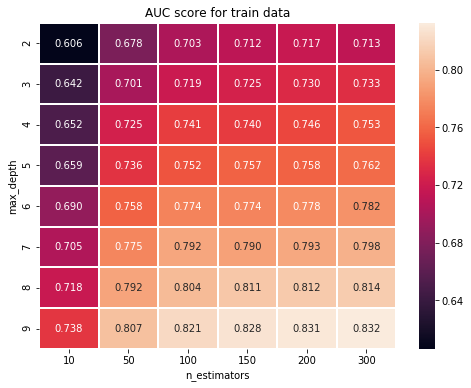

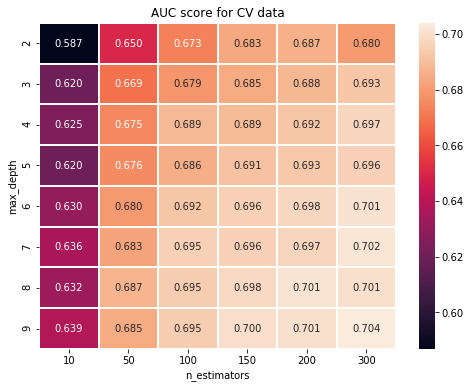

In [171]:
plt.figure(figsize=(8,6))
sns.heatmap(np.array(model_1.cv_results_["mean_train_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for train data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(np.array(model_1.cv_results_["mean_test_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for CV data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

In [170]:
print(model_1.score(train_set_1,y_train))
print(model_1.score(test_set_1,y_test))

0.8265928168896688
0.7142213739923869


In [172]:
final_model_1=model_1.best_estimator_
final_model_1.fit(train_set_1,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [173]:
pred_train_1=final_model_1.predict(train_set_1)
prob_train_1=final_model_1.predict_proba(train_set_1)
pred_test_1=final_model_1.predict(test_set_1)
prob_test_1=final_model_1.predict_proba(test_set_1)

In [174]:
from sklearn.metrics import roc_auc_score,roc_curve
print("ROC AUC score on Train dataset : ",roc_auc_score(y_train,prob_train_1[:,1]))
print("="*50)
print("Roc auc score on test data : ",roc_auc_score(y_test,prob_test_1[:,1]))

ROC AUC score on Train dataset :  0.8246008612555268
Roc auc score on test data :  0.7136959807433945


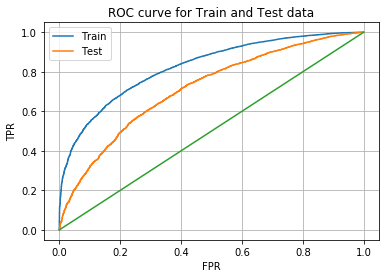

In [175]:
train_fpr_1,train_tpr_1,thresholds=roc_curve(y_train,prob_train_1[:,1])
test_fpr_1,test_tpr_1,thresholds=roc_curve(y_test,prob_test_1[:,1])
plt.plot(train_fpr_1,train_tpr_1,label="Train")
plt.plot(test_fpr_1,test_tpr_1,label="Test")
plt.title("ROC curve for Train and Test data")
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

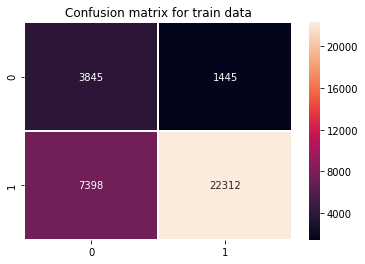

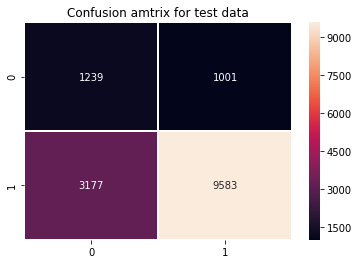

In [176]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,pred_train_1),annot=True,fmt="d",linewidths="1")
plt.title("Confusion matrix for train data")
plt.show()
sns.heatmap(confusion_matrix(y_test,pred_test_1),annot=True,fmt="d",linewidths="1")
plt.title("Confusion amtrix for test data")
plt.show()

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [60]:
train_set_2=hstack((tnoppp_train,price_train,school_state_train,teacher_prefix_train,project_grade_train,categories_train,subcategories_train,train_title_tfidf,train_essay_tfidf))
test_set_2=hstack((tnoppp_test,price_test,school_state_test,teacher_prefix_test,project_grade_test,categories_test,subcategories_test,test_title_tfidf,test_essay_tfidf))

In [178]:
model_2=GridSearchCV(RandomForestClassifier(min_samples_split=20,class_weight="balanced"),param_grid,cv=8,scoring="roc_auc",return_train_score=True)
model_2.fit(train_set_2,y_train)

GridSearchCV(cv=8, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=20,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                            

In [179]:
print(model_2.best_estimator_)
print("="*50)
print(model_2.best_params_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
{'max_depth': 9, 'n_estimators': 300}


In [180]:
print(model_2.score(train_set_2,y_train))
print(model_2.score(test_set_2,y_test))

0.8538574302695433
0.7151534510747872


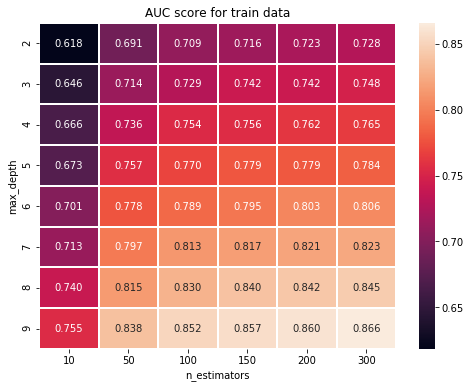

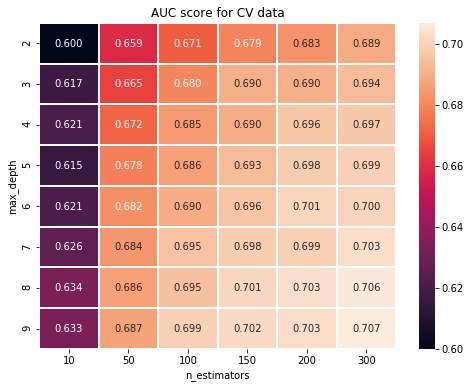

In [181]:
plt.figure(figsize=(8,6))
sns.heatmap(np.array(model_2.cv_results_["mean_train_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for train data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(np.array(model_2.cv_results_["mean_test_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for CV data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

In [182]:
final_model_2=model_2.best_estimator_
final_model_2.fit(train_set_2,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [183]:
pred_train_2=final_model_2.predict(train_set_2)
prob_train_2=final_model_2.predict_proba(train_set_2)
pred_test_2=final_model_2.predict(test_set_2)
prob_test_2=final_model_2.predict_proba(test_set_2)

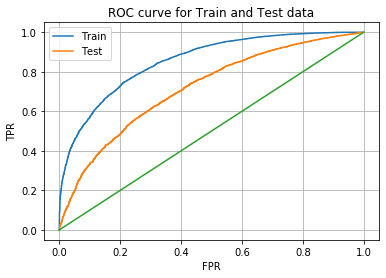

In [184]:
train_fpr_2,train_tpr_2,thresholds=roc_curve(y_train,prob_train_2[:,1])
test_fpr_2,test_tpr_2,thresholds=roc_curve(y_test,prob_test_2[:,1])
plt.plot(train_fpr_2,train_tpr_2,label="Train")
plt.plot(test_fpr_2,test_tpr_2,label="Test")
plt.title("ROC curve for Train and Test data")
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

In [185]:
print("ROC AUC score on Train dataset : ",roc_auc_score(y_train,prob_train_2[:,1]))
print("="*50)
print("Roc auc score on test data : ",roc_auc_score(y_test,prob_test_2[:,1]))

ROC AUC score on Train dataset :  0.8542297565820576
Roc auc score on test data :  0.7164003372704881


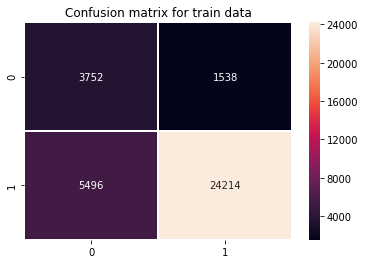

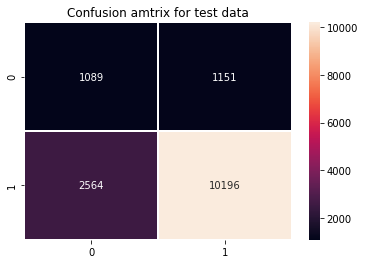

In [188]:
sns.heatmap(confusion_matrix(y_train,pred_train_2),annot=True,fmt="d",linewidths="1")
plt.title("Confusion matrix for train data")
plt.show()

sns.heatmap(confusion_matrix(y_test,pred_test_2),annot=True,fmt="d",linewidths="1")
plt.title("Confusion amtrix for test data")
plt.show()

### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [61]:
train_set_3=np.hstack((tnoppp_train,price_train,school_state_train,teacher_prefix_train,project_grade_train,categories_train,subcategories_train,train_avg_w2v_vectors_titles,train_avg_w2v_vectors_essays))
test_set_3=np.hstack((tnoppp_test,price_test,school_state_test,teacher_prefix_test,project_grade_test,categories_test,subcategories_test,test_avg_w2v_vectors_titles,test_avg_w2v_vectors_essays))

In [220]:
model_3=GridSearchCV(RandomForestClassifier(min_samples_split=20,class_weight="balanced"),param_grid,cv=8,scoring="roc_auc",return_train_score=True)
model_3.fit(train_set_3,y_train)

GridSearchCV(cv=8, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=20,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                            

In [221]:
print(model_3.best_estimator_)
print("="*50)
print(model_3.best_params_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
{'max_depth': 9, 'n_estimators': 300}


In [222]:
print(model_3.score(train_set_3,y_train))
print(model_3.score(test_set_3,y_test))

0.8967347115372991
0.697435974585759


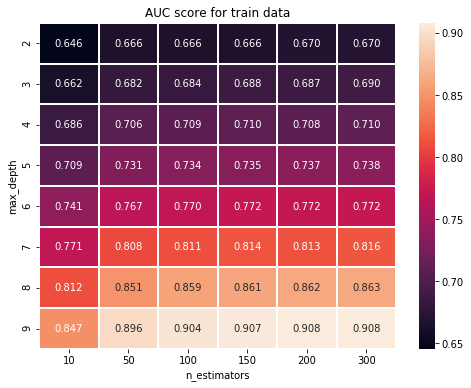

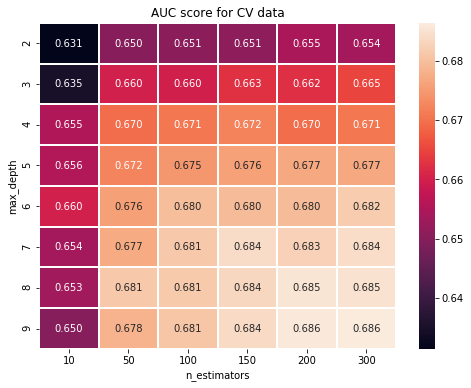

In [223]:
plt.figure(figsize=(8,6))
sns.heatmap(np.array(model_3.cv_results_["mean_train_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for train data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(np.array(model_3.cv_results_["mean_test_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for CV data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

In [224]:
final_model_3=model_3.best_estimator_
final_model_3.fit(train_set_3,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [225]:
pred_train_3=final_model_3.predict(train_set_3)
prob_train_3=final_model_3.predict_proba(train_set_3)
pred_test_3=final_model_3.predict(test_set_3)
prob_test_3=final_model_3.predict_proba(test_set_3)

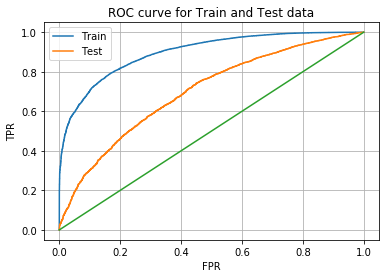

In [226]:
train_fpr_3,train_tpr_3,thresholds=roc_curve(y_train,prob_train_3[:,1])
test_fpr_3,test_tpr_3,thresholds=roc_curve(y_test,prob_test_3[:,1])
plt.plot(train_fpr_3,train_tpr_3,label="Train")
plt.plot(test_fpr_3,test_tpr_3,label="Test")
plt.title("ROC curve for Train and Test data")
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

In [227]:
print("ROC AUC score on Train dataset : ",roc_auc_score(y_train,prob_train_3[:,1]))
print("="*50)
print("Roc auc score on test data : ",roc_auc_score(y_test,prob_test_3[:,1]))

ROC AUC score on Train dataset :  0.8981335582336881
Roc auc score on test data :  0.6990634796238244


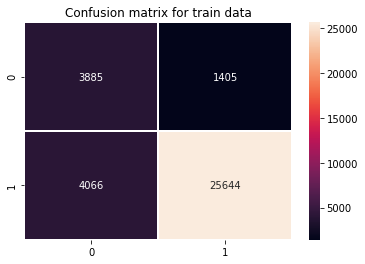

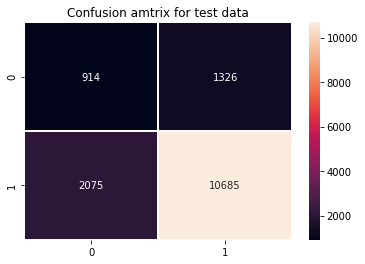

In [228]:
sns.heatmap(confusion_matrix(y_train,pred_train_3),annot=True,fmt="d",linewidths="1")
plt.title("Confusion matrix for train data")
plt.show()

sns.heatmap(confusion_matrix(y_test,pred_test_3),annot=True,fmt="d",linewidths="1")
plt.title("Confusion amtrix for test data")
plt.show()

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [62]:
train_set_4=np.hstack((tnoppp_train,price_train,school_state_train,teacher_prefix_train,project_grade_train,categories_train,subcategories_train,train_tfidf_w2v_vectors_titles,train_tfidf_w2v_vectors_essays))
test_set_4=np.hstack((tnoppp_test,price_test,school_state_test,teacher_prefix_test,project_grade_test,categories_test,subcategories_test,test_tfidf_w2v_vectors_titles,test_tfidf_w2v_vectors_essays))

In [231]:
model_4=GridSearchCV(RandomForestClassifier(min_samples_split=20,class_weight="balanced"),param_grid,cv=8,scoring="roc_auc",return_train_score=True)
model_4.fit(train_set_4,y_train)

GridSearchCV(cv=8, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=20,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                            

In [232]:
print(model_4.best_estimator_)
print("="*50)
print(model_4.best_params_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
{'max_depth': 9, 'n_estimators': 150}


In [233]:
print(model_4.score(train_set_4,y_train))
print(model_4.score(test_set_4,y_test))

0.8900686376624954
0.6956639400470219


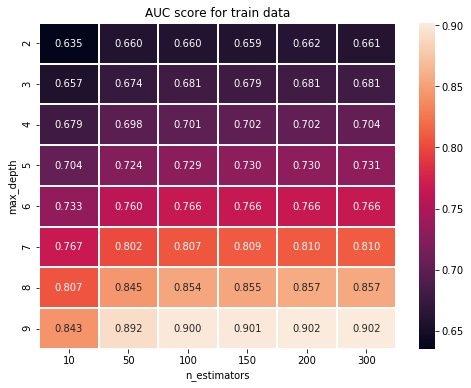

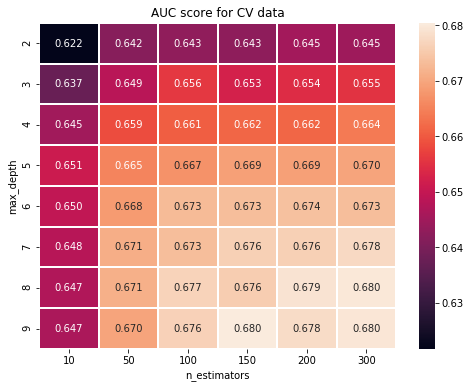

In [234]:
plt.figure(figsize=(8,6))
sns.heatmap(np.array(model_4.cv_results_["mean_train_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for train data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(np.array(model_4.cv_results_["mean_test_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for CV data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

In [235]:
final_model_4=model_4.best_estimator_
final_model_4.fit(train_set_4,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [236]:
pred_train_4=final_model_4.predict(train_set_4)
prob_train_4=final_model_4.predict_proba(train_set_4)
pred_test_4=final_model_4.predict(test_set_4)
prob_test_4=final_model_4.predict_proba(test_set_4)

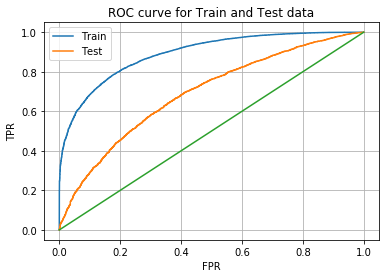

In [237]:
train_fpr_4,train_tpr_4,thresholds=roc_curve(y_train,prob_train_4[:,1])
test_fpr_4,test_tpr_4,thresholds=roc_curve(y_test,prob_test_4[:,1])
plt.plot(train_fpr_4,train_tpr_4,label="Train")
plt.plot(test_fpr_4,test_tpr_4,label="Test")
plt.title("ROC curve for Train and Test data")
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

In [238]:
print("ROC AUC score on Train dataset : ",roc_auc_score(y_train,prob_train_4[:,1]))
print("="*50)
print("Roc auc score on test data : ",roc_auc_score(y_test,prob_test_4[:,1]))

ROC AUC score on Train dataset :  0.891465610542745
Roc auc score on test data :  0.6906663191334528


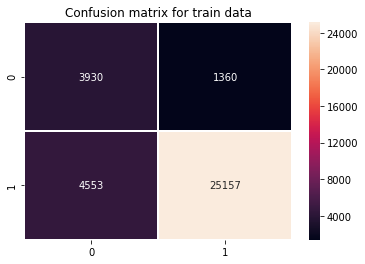

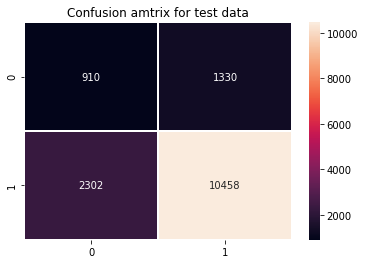

In [239]:
sns.heatmap(confusion_matrix(y_train,pred_train_4),annot=True,fmt="d",linewidths="1")
plt.title("Confusion matrix for train data")
plt.show()

sns.heatmap(confusion_matrix(y_test,pred_test_4),annot=True,fmt="d",linewidths="1")
plt.title("Confusion amtrix for test data")
plt.show()

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [63]:
import xgboost
from xgboost import XGBClassifier

In [64]:
xgb_model_1=GridSearchCV(XGBClassifier(),param_grid,cv=10,scoring="roc_auc",return_train_score=True)
xgb_model_1.fit(train_set_1,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [10, 50, 100, 150, 200, 300]},
             pre_dispatch='2*n

In [65]:
print(xgb_model_1.best_estimator_)
print("="*50)
print(xgb_model_1.best_params_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
{'max_depth': 6, 'n_estimators': 300}


In [66]:
print(xgb_model_1.score(train_set_1,y_train))
print("="*50)
print(xgb_model_1.score(test_set_1,y_test))

0.9661807415876178
0.7181867682300582


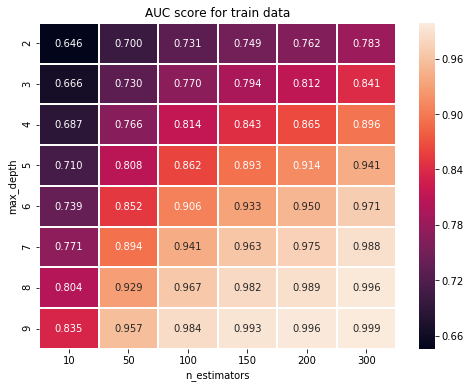

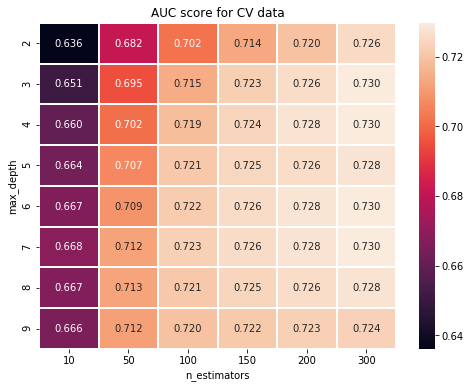

In [67]:
plt.figure(figsize=(8,6))
sns.heatmap(np.array(xgb_model_1.cv_results_["mean_train_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for train data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(np.array(xgb_model_1.cv_results_["mean_test_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for CV data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

In [68]:
xgb_final_model_1=xgb_model_1.best_estimator_
xgb_final_model_1.fit(train_set_1,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [69]:
xgb_pred_train_1=xgb_final_model_1.predict(train_set_1)
xgb_prob_train_1=xgb_final_model_1.predict_proba(train_set_1)
xgb_pred_test_1=xgb_final_model_1.predict(test_set_1)
xgb_prob_test_1=xgb_final_model_1.predict_proba(test_set_1)

In [79]:
print("% of misclassified train points : ",np.count_nonzero((xgb_pred_train_1-y_train))/y_train.shape[0])

% of misclassified train points :  0.1176


In [77]:
print("% of misclassified test points : ",np.count_nonzero((xgb_pred_test_1-y_test))/y_test.shape[0])

% of misclassified test points :  0.1536


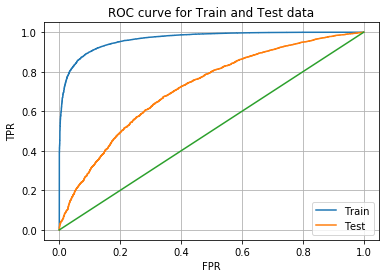

In [78]:
train_fpr_1,train_tpr_1,thresholds=roc_curve(y_train,xgb_prob_train_1[:,1])
test_fpr_1,test_tpr_1,thresholds=roc_curve(y_test,xgb_prob_test_1[:,1])
plt.plot(train_fpr_1,train_tpr_1,label="Train")
plt.plot(test_fpr_1,test_tpr_1,label="Test")
plt.title("ROC curve for Train and Test data")
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

In [81]:
from sklearn.metrics import roc_auc_score
print("ROC AUC score on Train dataset : ",roc_auc_score(y_train,xgb_prob_train_1[:,1]))
print("="*50)
print("Roc auc score on test data : ",roc_auc_score(y_test,xgb_prob_test_1[:,1]))

ROC AUC score on Train dataset :  0.9661807415876178
Roc auc score on test data :  0.7181867682300582


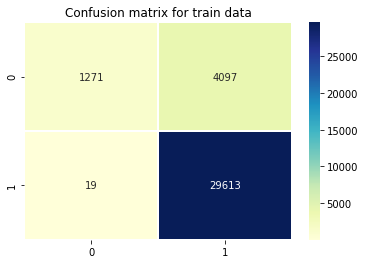

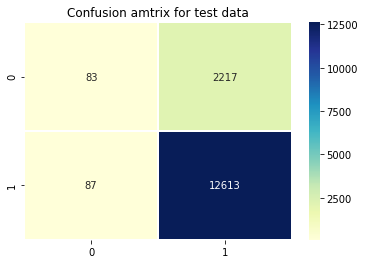

In [87]:
sns.heatmap(confusion_matrix(y_train,xgb_pred_train_1),annot=True,fmt="d",linewidths="1",cmap="YlGnBu")
plt.title("Confusion matrix for train data")
plt.show()

sns.heatmap(confusion_matrix(y_test,xgb_pred_test_1),annot=True,fmt="d",linewidths="1",cmap="YlGnBu")
plt.title("Confusion amtrix for test data")
plt.show()

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [88]:
xgb_model_2=GridSearchCV(XGBClassifier(),param_grid,cv=10,scoring="roc_auc",return_train_score=True)
xgb_model_2.fit(train_set_2,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [10, 50, 100, 150, 200, 300]},
             pre_dispatch='2*n

In [89]:
print(xgb_model_2.best_estimator_)
print("="*50)
print(xgb_model_2.best_params_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
{'max_depth': 3, 'n_estimators': 300}


In [90]:
print(xgb_model_2.score(train_set_2,y_train))
print("="*50)
print(xgb_model_2.score(test_set_2,y_test))

0.8602087368591735
0.7189259671345429


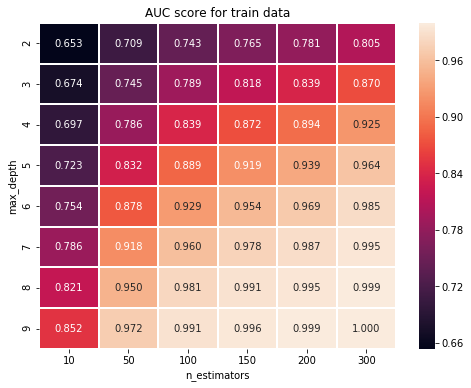

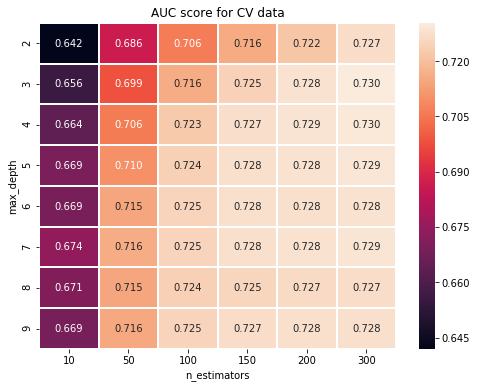

In [91]:
plt.figure(figsize=(8,6))
sns.heatmap(np.array(xgb_model_2.cv_results_["mean_train_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for train data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(np.array(xgb_model_2.cv_results_["mean_test_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for CV data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

In [92]:
xgb_final_model_2=xgb_model_2.best_estimator_
xgb_final_model_2.fit(train_set_2,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [93]:
xgb_pred_train_2=xgb_final_model_2.predict(train_set_2)
xgb_prob_train_2=xgb_final_model_2.predict_proba(train_set_2)
xgb_pred_test_2=xgb_final_model_2.predict(test_set_2)
xgb_prob_test_2=xgb_final_model_2.predict_proba(test_set_2)

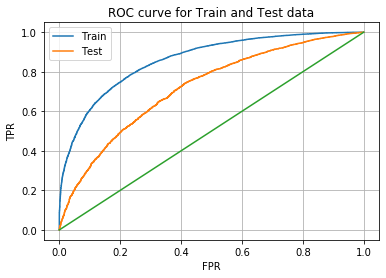

In [94]:
train_fpr_2,train_tpr_2,thresholds=roc_curve(y_train,xgb_prob_train_2[:,1])
test_fpr_2,test_tpr_2,thresholds=roc_curve(y_test,xgb_prob_test_2[:,1])
plt.plot(train_fpr_2,train_tpr_2,label="Train")
plt.plot(test_fpr_2,test_tpr_2,label="Test")
plt.title("ROC curve for Train and Test data")
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

In [95]:
print("ROC AUC score on Train dataset : ",roc_auc_score(y_train,xgb_prob_train_2[:,1]))
print("="*50)
print("Roc auc score on test data : ",roc_auc_score(y_test,xgb_prob_test_2[:,1]))

ROC AUC score on Train dataset :  0.8602087368591735
Roc auc score on test data :  0.7189259671345429


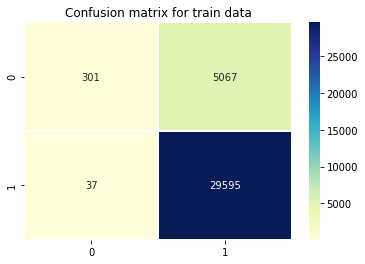

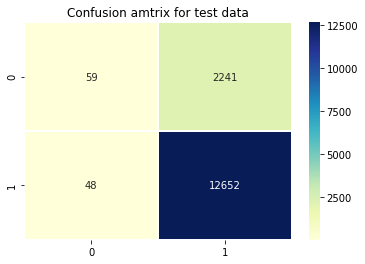

In [96]:
sns.heatmap(confusion_matrix(y_train,xgb_pred_train_2),annot=True,fmt="d",linewidths="1",cmap="YlGnBu")
plt.title("Confusion matrix for train data")
plt.show()

sns.heatmap(confusion_matrix(y_test,xgb_pred_test_2),annot=True,fmt="d",linewidths="1",cmap="YlGnBu")
plt.title("Confusion amtrix for test data")
plt.show()

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [97]:
xgb_model_3=GridSearchCV(XGBClassifier(),param_grid,cv=10,scoring="roc_auc",return_train_score=True)
xgb_model_3.fit(train_set_3,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [10, 50, 100, 150, 200, 300]},
             pre_dispatch='2*n

In [98]:
print(xgb_model_3.best_estimator_)
print("="*50)
print(xgb_model_3.best_params_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
{'max_depth': 3, 'n_estimators': 300}


In [99]:
print(xgb_model_3.score(train_set_3,y_train))
print("="*50)
print(xgb_model_3.score(test_set_3,y_test))

0.8155809216754835
0.6894105100992811


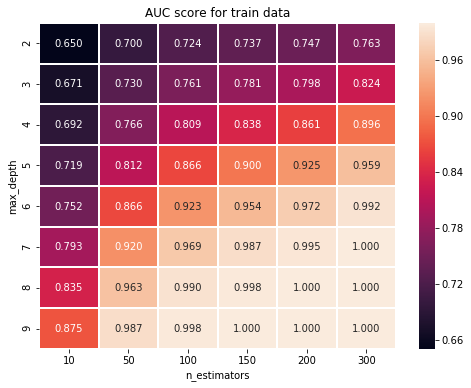

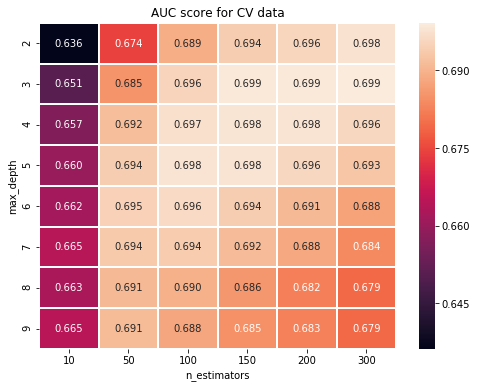

In [100]:
plt.figure(figsize=(8,6))
sns.heatmap(np.array(xgb_model_3.cv_results_["mean_train_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for train data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(np.array(xgb_model_3.cv_results_["mean_test_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for CV data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

In [101]:
xgb_final_model_3=xgb_model_3.best_estimator_
xgb_final_model_3.fit(train_set_3,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [102]:
xgb_pred_train_3=xgb_final_model_3.predict(train_set_3)
xgb_prob_train_3=xgb_final_model_3.predict_proba(train_set_3)
xgb_pred_test_3=xgb_final_model_3.predict(test_set_3)
xgb_prob_test_3=xgb_final_model_3.predict_proba(test_set_3)

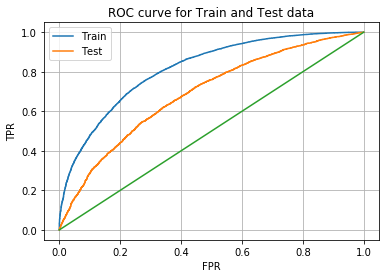

In [103]:
train_fpr_3,train_tpr_3,thresholds=roc_curve(y_train,xgb_prob_train_3[:,1])
test_fpr_3,test_tpr_3,thresholds=roc_curve(y_test,xgb_prob_test_3[:,1])
plt.plot(train_fpr_3,train_tpr_3,label="Train")
plt.plot(test_fpr_3,test_tpr_3,label="Test")
plt.title("ROC curve for Train and Test data")
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

In [104]:
print("ROC AUC score on Train dataset : ",roc_auc_score(y_train,xgb_prob_train_3[:,1]))
print("="*50)
print("Roc auc score on test data : ",roc_auc_score(y_test,xgb_prob_test_3[:,1]))

ROC AUC score on Train dataset :  0.8155809216754835
Roc auc score on test data :  0.6894105100992811


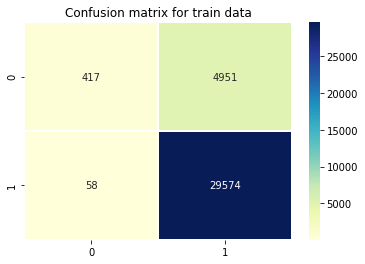

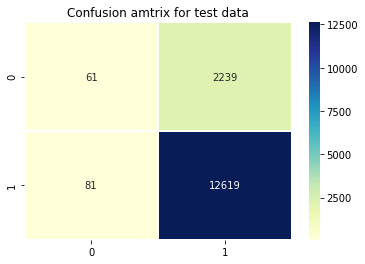

In [105]:
sns.heatmap(confusion_matrix(y_train,xgb_pred_train_3),annot=True,fmt="d",linewidths="1",cmap="YlGnBu")
plt.title("Confusion matrix for train data")
plt.show()

sns.heatmap(confusion_matrix(y_test,xgb_pred_test_3),annot=True,fmt="d",linewidths="1",cmap="YlGnBu")
plt.title("Confusion amtrix for test data")
plt.show()

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [106]:
xgb_model_4=GridSearchCV(XGBClassifier(),param_grid,cv=10,scoring="roc_auc",return_train_score=True)
xgb_model_4.fit(train_set_4,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [10, 50, 100, 150, 200, 300]},
             pre_dispatch='2*n

In [107]:
print(xgb_model_4.best_estimator_)
print("="*50)
print(xgb_model_4.best_params_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
{'max_depth': 2, 'n_estimators': 300}


In [108]:
print(xgb_model_4.score(train_set_4,y_train))
print("="*50)
print(xgb_model_4.score(test_set_4,y_test))

0.7543678486905846
0.6829689489900719


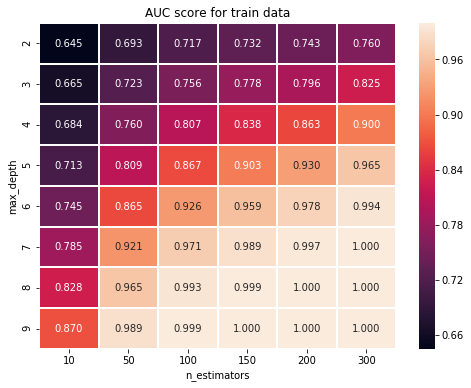

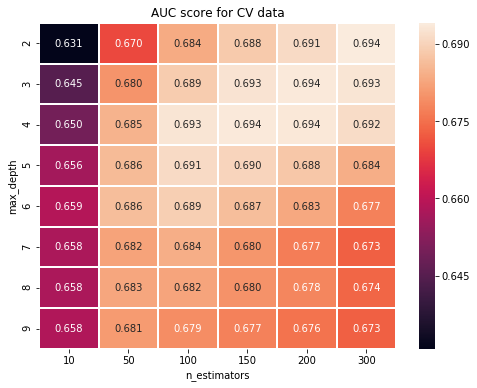

In [109]:
plt.figure(figsize=(8,6))
sns.heatmap(np.array(xgb_model_4.cv_results_["mean_train_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for train data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(np.array(xgb_model_4.cv_results_["mean_test_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for CV data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

In [110]:
xgb_final_model_4=xgb_model_4.best_estimator_
xgb_final_model_4.fit(train_set_4,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [111]:
xgb_pred_train_4=xgb_final_model_4.predict(train_set_4)
xgb_prob_train_4=xgb_final_model_4.predict_proba(train_set_4)
xgb_pred_test_4=xgb_final_model_4.predict(test_set_4)
xgb_prob_test_4=xgb_final_model_4.predict_proba(test_set_4)

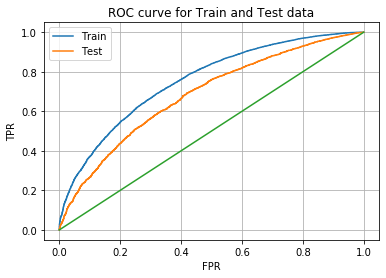

In [113]:
train_fpr_4,train_tpr_4,thresholds=roc_curve(y_train,xgb_prob_train_4[:,1])
test_fpr_4,test_tpr_4,thresholds=roc_curve(y_test,xgb_prob_test_4[:,1])
plt.plot(train_fpr_4,train_tpr_4,label="Train")
plt.plot(test_fpr_4,test_tpr_4,label="Test")
plt.title("ROC curve for Train and Test data")
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

In [114]:
print("ROC AUC score on Train dataset : ",roc_auc_score(y_train,xgb_prob_train_4[:,1]))
print("="*50)
print("Roc auc score on test data : ",roc_auc_score(y_test,xgb_prob_test_4[:,1]))

ROC AUC score on Train dataset :  0.7543678486905846
Roc auc score on test data :  0.6829689489900719


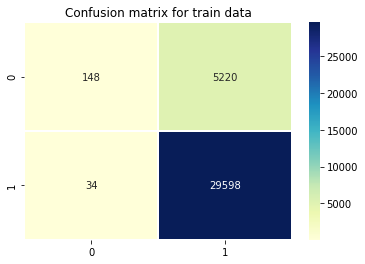

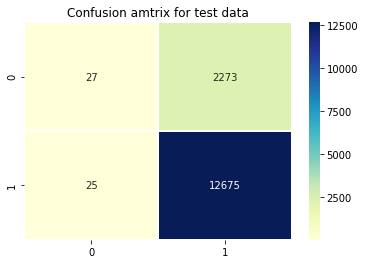

In [115]:
sns.heatmap(confusion_matrix(y_train,xgb_pred_train_4),annot=True,fmt="d",linewidths="1",cmap="YlGnBu")
plt.title("Confusion matrix for train data")
plt.show()

sns.heatmap(confusion_matrix(y_test,xgb_pred_test_4),annot=True,fmt="d",linewidths="1",cmap="YlGnBu")
plt.title("Confusion amtrix for test data")
plt.show()

<h1>3. Conclusion</h1>

In [119]:
from prettytable import PrettyTable
table1=PrettyTable()
print("Random Forest")
table1.field_names=("Text_Vec","Max_Depth","n_estimators","Train AUC Score","Test AUC Score")
table1.add_row(["BOW",9,300,0.82,0.71])
table1.add_row(["Tfidf",9,300,0.85,0.72])
table1.add_row(["Avg W2V",9,300,0.89,0.70])
table1.add_row(["Tfidf W2V",9,150,0.89,0.69])
print(table1)
table2=PrettyTable()
print("GBDT(XGBoost)")
table2.field_names=("Text_Vec","Max_Depth","n_estimators","Train AUC Score","Test AUC Score")
table2.add_row(["BOW",6,300,0.96,0.72])
table2.add_row(["Tfidf",3,300,0.86,0.72])
table2.add_row(["Avg W2V",3,300,0.81,0.69])
table2.add_row(["Tfidf W2V",2,300,0.75,0.68])
print(table2)

Random Forest
+-----------+-----------+--------------+-----------------+----------------+
|  Text_Vec | Max_Depth | n_estimators | Train AUC Score | Test AUC Score |
+-----------+-----------+--------------+-----------------+----------------+
|    BOW    |     9     |     300      |       0.82      |      0.71      |
|   Tfidf   |     9     |     300      |       0.85      |      0.72      |
|  Avg W2V  |     9     |     300      |       0.89      |      0.7       |
| Tfidf W2V |     9     |     150      |       0.89      |      0.69      |
+-----------+-----------+--------------+-----------------+----------------+
GBDT(XGBoost)
+-----------+-----------+--------------+-----------------+----------------+
|  Text_Vec | Max_Depth | n_estimators | Train AUC Score | Test AUC Score |
+-----------+-----------+--------------+-----------------+----------------+
|    BOW    |     6     |     300      |       0.96      |      0.72      |
|   Tfidf   |     3     |     300      |       0.86      |  

<b>Observation :</b>

Random forest classifier on tfidf vectorizer gave auc score 0.72 on test data and on train data 0.85 so this model is fairly good not very good.
XGBoost classifier on tfidf vecorizer dataset gave auc score 0.86 on train data and 0.72 on test data ,and for tfidf W2V train auc sore is 0.75 and test auc sore is 0.68 so this model is not very much overfit it is fairly good model.